In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 3

In [2]:
# Import the dataset
data = pd.read_csv('cleaned_data.csv')

#### Remaining financial features: 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', and 'PAY_AMT6'.

#### Naming the features bill_feats and pay_amt_feats, respectively.

In [3]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### using .describe() to examine statistical summaries of the bill amount features

In [4]:
data[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


#### visualizing the bill amount features using a 2 by 3 grid of histogram plots.

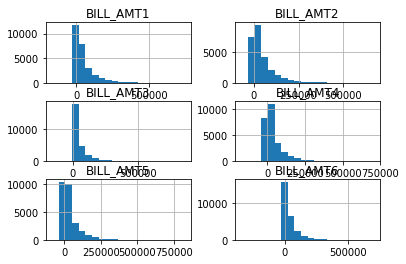

In [5]:
data[bill_feats].hist(bins = 20)
plt.show()

#### .describe() summary of the payment amount features.

In [6]:
data[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


#### Next, plot a histogram of the bill payment features similar to the bill amount features, but also apply some rotation to the x-axis labels with the xrot keyword argument so that they don't overlap. In any plotting function, you can include the xrot = < angle> keyword argument to rotate x-axis labels by a given angle in degrees.

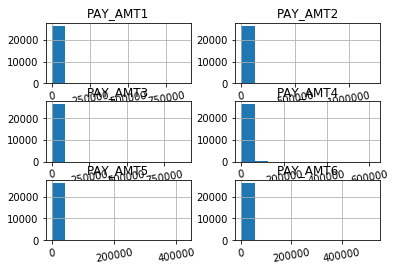

In [7]:
data[pay_amt_feats].hist(xrot = 10)
plt.show()

#### use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using .head() and .sum().

In [8]:
payment_amt_mask = data[pay_amt_feats] == 0

In [9]:
payment_amt_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [10]:
payment_amt_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

In [11]:
import numpy as np

#### Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas .apply() and NumPy's np.log10() to plot histograms of logarithmic transformations of the non-zero payments.

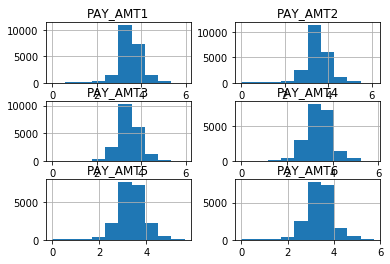

In [14]:
data[pay_amt_feats][~payment_amt_mask].apply(lambda x: np.log10(x)).hist()
plt.show()